In [272]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Подготовка данных

In [273]:
df_r = pd.read_csv('../data/classification/responses_preprocessed.csv')
df_r.drop(columns='Unnamed: 0', inplace=True)
# Выделяем матрицу признаков и вектор лейблов из датасета
X = df_r.drop(['Gender_male', 'Gender_nan'], axis=1)
y = df_r['Gender_male']
X

Age  Height  Weight  Number of siblings  Music_2.0  Music_3.0  \
0     20.0   163.0    48.0                 1.0          0          0   
1     19.0   163.0    58.0                 2.0          0          0   
2     20.0   176.0    67.0                 2.0          0          0   
3     22.0   172.0    59.0                 1.0          0          0   
4     20.0   170.0    59.0                 1.0          0          0   
...    ...     ...     ...                 ...        ...        ...   
999   19.0   181.0    70.0                 1.0          0          0   
1000  16.0   153.0    62.0                 1.0          0          0   
1001  18.0   160.0    63.0                 2.0          0          0   
1002  22.0   181.0    72.0                 1.0          0          0   
1003  20.0   172.0    63.0                 1.0          0          0   

      Music_4.0  Music_5.0  Music_nan  Slow songs or fast songs_2.0  ...  \
0             0          1          0                             0  ...   
1             1          0          0                             0  ...   
2             0          1          0                             0  ...   
3             0          1          0                             0  ...   
4             0          1          0                             0  ...   
...         ...        ...        ...                           ...  ...   
999           0          1          0                             0  ...   
1000          0          1          0                             0  ...   
1001          0          1          0                             0  ...   
1002          0          1          0                             0  ...   
1003          1          0          0                             0  ...   

      Education_masters degree  Education_primary school  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
999                          0                         0   
1000                         0                         1   
1001                         0                         1   
1002                         0                         0   
1003                         0                         0   

      Education_secondary school  Education_nan  Only child_yes  \
0                              0              0               0   
1                              0              0               0   
2                              1              0               0   
3                              0              0               1   
4                              1              0               0   
...                          ...            ...             ...   
999                            1              0               0   
1000                           0              0               0   
1001                           0              0               0   
1002                           1              0               0   
1003                           1              0               0   

      Only child_nan  Village - town_village  Village - town_nan  \
0                  0                       1                   0   
1                  0                       0                   0   
2                  0                       0                   0   
3                  0                       0                   0   
4                  0                       1                   0   
...              ...                     ...                 ...   
999                0                       0                   0   
1000               0                       0                   0   
1001               0                       0                   0   
1002               0   

In [274]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Преобразуем числовые признаки путём их скалирования
sc.fit(X.iloc[:,:4])
X.iloc[:,:4] = pd.DataFrame(sc.transform(X.iloc[:,:4]), columns=X.iloc[:,:4].columns)
X

Age    Height    Weight  Number of siblings  Music_2.0  Music_3.0  \
0    -0.146449 -1.061308 -1.345288           -0.294128          0          0   
1    -0.504197 -1.061308 -0.614248            0.703523          0          0   
2    -0.146449  0.249956  0.043688            0.703523          0          0   
3     0.569047 -0.153510 -0.541144           -0.294128          0          0   
4    -0.146449 -0.355243 -0.541144           -0.294128          0          0   
...        ...       ...       ...                 ...        ...        ...   
999  -0.504197  0.754288  0.263000           -0.294128          0          0   
1000 -1.577441 -2.069972 -0.321832           -0.294128          0          0   
1001 -0.861945 -1.363907 -0.248728            0.703523          0          0   
1002  0.569047  0.754288  0.409208           -0.294128          0          0   
1003 -0.146449 -0.153510 -0.248728           -0.294128          0          0   

      Music_4.0  Music_5.0  Music_nan  Slow songs or fast songs_2.0  ...  \
0             0          1          0                             0  ...   
1             1          0          0                             0  ...   
2             0          1          0                             0  ...   
3             0          1          0                             0  ...   
4             0          1          0                             0  ...   
...         ...        ...        ...                           ...  ...   
999           0          1          0                             0  ...   
1000          0          1          0                             0  ...   
1001          0          1          0                             0  ...   
1002          0          1          0                             0  ...   
1003          1          0          0                             0  ...   

      Education_masters degree  Education_primary school  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
999                          0                         0   
1000                         0                         1   
1001                         0                         1   
1002                         0                         0   
1003                         0                         0   

      Education_secondary school  Education_nan  Only child_yes  \
0                              0              0               0   
1                              0              0               0   
2                              1              0               0   
3                              0              0               1   
4                              1              0               0   
...                          ...            ...             ...   
999                            1              0               0   
1000                           0              0               0   
1001                           0              0               0   
1002                           1              0               0   
1003                           1              0               0   

      Only child_nan  Village - town_village  Village - town_nan  \
0                  0                       1                   0   
1                  0                       0                   0   
2                  0                       0                   0   
3                  0                       0                   0   
4                  0                       1                   0   
...              ...                     ...                 ...   
999                0                       0                   0   
1000               0                       0                   0   

In [275]:
from sklearn.model_selection import train_test_split
from collections import Counter
# Разделяем данные на обучение и тест с сохранением соотношения классов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
print(Counter(y_train).values())
print(Counter(y_test).values())

dict_values([399, 273])
dict_values([197, 135])


## Построение классификационных моделей

In [276]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils.vis_utils import plot_model

def create_model(model, number_of_model):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=150, verbose=0)
    _ , accuracy = model.evaluate(X_test, y_test)
    print('Accuracy: %.5f' % (accuracy * 100))
    models[number_of_model] = model
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Множество наших моделей
models = dict()

### Модель №1

Для начала попробуем создать НС без скрытых слоёв.

In [277]:
number_of_model = 1
model = Sequential()
model.add(Input(X.shape[1], name='InputLayer'))
model.add(Dense(y.nunique() - 1, activation='sigmoid', name='OutputLayer'))
plot_model(model, to_file='../plots/7_model_{}.png'.format(number_of_model), rankdir='LR', show_shapes=True, show_layer_names=True)

In [278]:
%%time
create_model(model, number_of_model)

11/11 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.9006
Accuracy: 90.06024
[[187  10]
 [ 23 112]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       197
           1       0.92      0.83      0.87       135

    accuracy                           0.90       332
   macro avg       0.90      0.89      0.90       332
weighted avg       0.90      0.90      0.90       332

Wall time: 6.85 s


### Модель №2

Скорее всего, качество можно повысить, повысив сложность модели.

Попробуем добавить один скрытый слой с 25 нейронами с функцией активации relu.

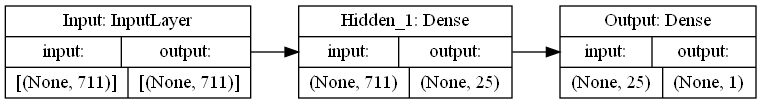

In [279]:
number_of_model = 2
model = Sequential()
model.add(Input(X.shape[1], name='Input'))
model.add(Dense(25, name='Hidden_1', activation='relu'))
model.add(Dense(y.nunique() - 1, activation='sigmoid', name='Output'))
plot_model(model, to_file='../plots/7_model_{}.png'.format(number_of_model), rankdir='LR', show_shapes=True, show_layer_names=True)

In [280]:
%%time
create_model(model, number_of_model)

11/11 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.9066
Accuracy: 90.66265
[[187  10]
 [ 21 114]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       197
           1       0.92      0.84      0.88       135

    accuracy                           0.91       332
   macro avg       0.91      0.90      0.90       332
weighted avg       0.91      0.91      0.91       332

Wall time: 9.37 s


### Модель №3

Действительно, качество немножко повысилось, с повышением сложности модели.

Не будем останавливаться на достигнутом и добавить ёще один скрытый слой
с 12 нейронами с функцией активации relu.

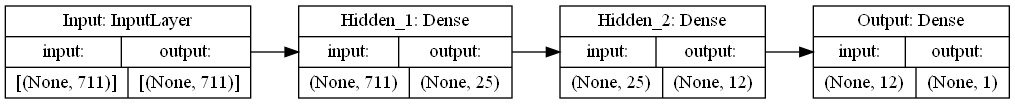

In [281]:
number_of_model = 3
model = Sequential()
model.add(Input(X.shape[1], name='Input'))
model.add(Dense(25, name='Hidden_1', activation='relu'))
model.add(Dense(12, name='Hidden_2', activation='relu'))
model.add(Dense(y.nunique() - 1, activation='sigmoid', name='Output'))
plot_model(model, to_file='../plots/7_model_{}.png'.format(number_of_model), rankdir='LR', show_shapes=True, show_layer_names=True)

In [282]:
%%time
create_model(model, number_of_model)


11/11 [==============================] - 0s 2ms/step - loss: 0.5295 - accuracy: 0.9006
Accuracy: 90.06024
[[186  11]
 [ 22 113]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       197
           1       0.91      0.84      0.87       135

    accuracy                           0.90       332
   macro avg       0.90      0.89      0.90       332
weighted avg       0.90      0.90      0.90       332

Wall time: 9.85 s


### Модель №4

Качество модели несколько упало, оно равным модели без скрытых слоёв.

Возможно, сложность модели слишком велика и стоит вернуться
к одному скрытому слою и 25 нейронам, но ради эксперимента добавим ещё один
скрытый слой с 8 нейронами и функцией активации сигмоид.

In [283]:
number_of_model = 4
model = Sequential()
model.add(Input(X.shape[1], name='Input'))
model.add(Dense(25, name='Hidden_1', activation='relu'))
model.add(Dense(12, name='Hidden_2', activation='relu'))
model.add(Dense(8, name='Hidden_3', activation='sigmoid'))
model.add(Dense(y.nunique() - 1, activation='sigmoid', name='Output'))
plot_model(model, to_file='../plots/7_model_{}.png'.format(number_of_model), rankdir='LR', show_shapes=True, show_layer_names=True)

In [284]:
%%time
create_model(model, number_of_model)


11/11 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.9096
Accuracy: 90.96386
[[188   9]
 [ 21 114]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       197
           1       0.93      0.84      0.88       135

    accuracy                           0.91       332
   macro avg       0.91      0.90      0.90       332
weighted avg       0.91      0.91      0.91       332

Wall time: 9.14 s


### Модель №5

Неожиданно точность немного повысилась.

Теперь вернёмся к одному слою и попробуем поменять функции активации на сигмоидальную.

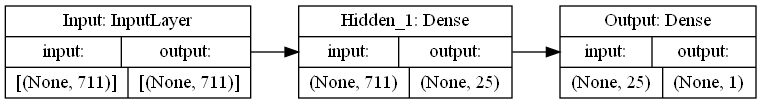

In [285]:
number_of_model = 5
model = Sequential()
model.add(Input(X.shape[1], name='Input'))
model.add(Dense(25, name='Hidden_1', activation='sigmoid'))
model.add(Dense(y.nunique() - 1, activation='sigmoid', name='Output'))
plot_model(model, to_file='../plots/7_model_{}.png'.format(number_of_model), rankdir='LR', show_shapes=True, show_layer_names=True)

In [286]:
%%time
create_model(model, number_of_model)


11/11 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8976
Accuracy: 89.75903
[[187  10]
 [ 24 111]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       197
           1       0.92      0.82      0.87       135

    accuracy                           0.90       332
   macro avg       0.90      0.89      0.89       332
weighted avg       0.90      0.90      0.90       332

Wall time: 8.75 s


Как можно заметить, данные модели обучаются несколько дольше стандартных и
имеют в среднем лучшее качество, чем последние.

Однако есть одна базовая модель с подобранными гиперпараметрами, которая
превосходит данные нейронные сети и выдаёт точность равную аж 0.95.

### Подбор гиперпараметров

Никто нам не мешает пойти путём перебора данных гиперпараметров.

### Подбор количества нейронов при одном скрытом слое и сигмоидальной функции активации

Зафиксируем функции активации и один скрытый слой.

В качестве метрики качества моделей будем использовать всё
также точность и также плюсом f1.

In [288]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [289]:
%%time
best_model_by_accuracy = None
best_model_by_f1_score = None
best_accuracy = 0
best_f1_score = 0
all_accuracy = []
all_f1_score = []
for num_neurons in range(1, 100):
    model = Sequential()
    model.add(Input(X.shape[1], name='Input'))
    model.add(Dense(num_neurons, name='Hidden_1', activation='sigmoid'))
    model.add(Dense(y.nunique() - 1, activation='sigmoid', name='Output'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=150, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy * 100
    f1 = f1 * 100
    all_accuracy.append(accuracy)
    all_f1_score.append(f1)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_by_accuracy = model
    if f1 > best_f1_score:
        best_f1_score = f1
        best_model_by_f1_score = model

Wall time: 14min 14s


Best accuracy: 91.26506
Best f1 score: 88.97338


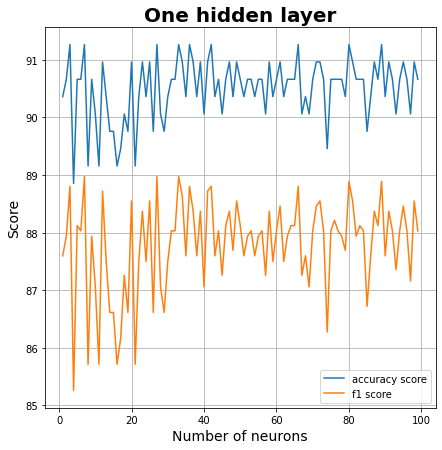

In [290]:
fig, ax = plt.subplots()

fig.set_figheight(7)
fig.set_figwidth(7)
ax.plot(range(1, 100), all_accuracy, label="accuracy score")
ax.plot(range(1, 100), all_f1_score, label="f1 score")
ax.grid(True)
plt.title('One hidden layer', fontsize=20, fontweight="bold")
plt.xlabel('Number of neurons', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend()

print('Best accuracy: %.5f' % best_accuracy)
print('Best f1 score: %.5f' % best_f1_score)

Как можно заметить, чёткой закономерности между точностью и количеством нейронов нет.

### Подбор количества нейронов при одном скрытом слое и функции активации relu

Зафиксируем функции активации и один скрытый слой.

In [291]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [294]:
%%time
best_model_by_accuracy = None
best_model_by_f1_score = None
best_accuracy = 0
best_f1_score = 0
all_accuracy = []
all_f1_score = []
for num_neurons in range(1, 100):
    model = Sequential()
    model.add(Input(X.shape[1], name='Input'))
    model.add(Dense(num_neurons, name='Hidden_1', activation='relu'))
    model.add(Dense(y.nunique() - 1, activation='sigmoid', name='Output'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=150, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy * 100
    f1 = f1 * 100
    all_accuracy.append(accuracy)
    all_f1_score.append(f1)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_by_accuracy = model
    if f1 > best_f1_score:
        best_f1_score = f1
        best_model_by_f1_score = model

Wall time: 11min 29s


Best accuracy: 92.16867
Best f1 score: 90.07634


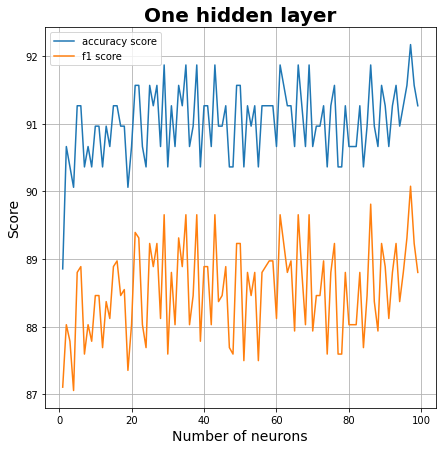

In [295]:
fig, ax = plt.subplots()

fig.set_figheight(7)
fig.set_figwidth(7)
ax.plot(range(1, 100), all_accuracy, label="accuracy score")
ax.plot(range(1, 100), all_f1_score, label="f1 score")
ax.grid(True)
plt.title('One hidden layer', fontsize=20, fontweight="bold")
plt.xlabel('Number of neurons', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend()

print('Best accuracy: %.5f' % best_accuracy)
print('Best f1 score: %.5f' % best_f1_score)

In [296]:
best_model_by_accuracy == best_model_by_f1_score

True

Рассмотрим получившуюся наилучшую модель повнимательнее.

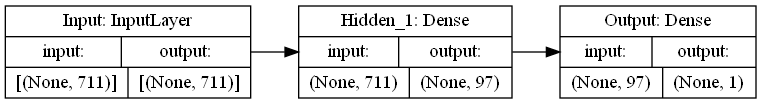

In [297]:
model = best_model_by_accuracy
plot_model(model, to_file='../plots/7_model_best.png', rankdir='LR', show_shapes=True, show_layer_names=True)

In [298]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy * 100
f1 = f1 * 100

print('accuracy: ' + str(best_accuracy))
print('f1 score: ' + str(best_f1_score))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


accuracy: 92.16867469879519
f1 score: 90.0763358778626
[[188   9]
 [ 17 118]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       197
           1       0.93      0.87      0.90       135

    accuracy                           0.92       332
   macro avg       0.92      0.91      0.92       332
weighted avg       0.92      0.92      0.92       332



Хорошо, теперь сохраним её и сразу попробуем загрузить модель.

In [299]:
best_model_by_accuracy.save('../keras_models/7_best_model')

INFO:tensorflow:Assets written to: ../keras_models/7_best_model\assets


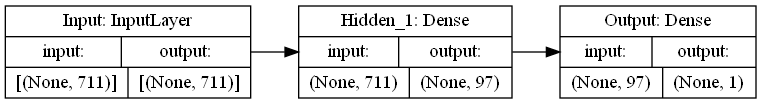

In [301]:
from keras.models import load_model
reconstructed_model = load_model('../keras_models/7_best_model')

model = reconstructed_model
plot_model(model, to_file='../plots/7_model_best.png', rankdir='LR', show_shapes=True, show_layer_names=True)

In [302]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy * 100
f1 = f1 * 100

print('accuracy: ' + str(best_accuracy))
print('f1 score: ' + str(best_f1_score))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


accuracy: 92.16867469879519
f1 score: 90.0763358778626
[[188   9]
 [ 17 118]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       197
           1       0.93      0.87      0.90       135

    accuracy                           0.92       332
   macro avg       0.92      0.91      0.92       332
weighted avg       0.92      0.92      0.92       332

